# 1. LINE:Large-scale Information Network Embedding

In [3]:
!pip install Vose-Alias-Method

In [4]:
# Import library
import networkx as nx
import numpy as np
from vose_sampler import VoseAlias
import matplotlib.pyplot as plt
import collections
from tqdm import tqdm
from tqdm import trange

In [5]:
# Load the karate club network
G = nx.karate_club_graph()

# Define the first-order proximity matrix
P = nx.to_numpy_array(G)

# Normalize the proximity matrix
P_normalized = P / P.sum(axis=1)[:, np.newaxis]

print(P_normalized)

[[0.         0.0952381  0.11904762 ... 0.04761905 0.         0.        ]
 [0.13793103 0.         0.20689655 ... 0.         0.         0.        ]
 [0.15151515 0.18181818 0.         ... 0.         0.06060606 0.        ]
 ...
 [0.0952381  0.         0.         ... 0.         0.19047619 0.19047619]
 [0.         0.         0.05263158 ... 0.10526316 0.         0.13157895]
 [0.         0.         0.         ... 0.08333333 0.10416667 0.        ]]


In [6]:
P

array([[0., 4., 5., ..., 2., 0., 0.],
       [4., 0., 6., ..., 0., 0., 0.],
       [5., 6., 0., ..., 0., 2., 0.],
       ...,
       [2., 0., 0., ..., 0., 4., 4.],
       [0., 0., 2., ..., 4., 0., 5.],
       [0., 0., 0., ..., 4., 5., 0.]])

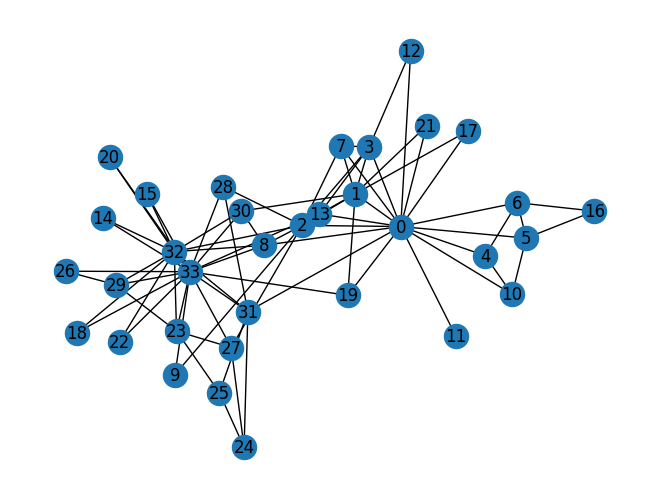

In [7]:
nx.draw(G, with_labels = True)

## 1.1. Edge Sampling

Sampling an edge from the alias table

In [8]:
def create_alias_table(area_ratio):
    l = len(area_ratio)
    accept, alias = [0] * l, [0] * l
    small, large = [], []
    area_ratio_ = np.array(area_ratio) * l
    for i, prob in enumerate(area_ratio_):
        if prob < 1.0:
            small.append(i)
        else:
            large.append(i)

    while small and large:
        small_idx, large_idx = small.pop(), large.pop()
        accept[small_idx] = area_ratio_[small_idx]
        alias[small_idx] = large_idx
        area_ratio_[large_idx] = area_ratio_[large_idx] - \
                                 (1 - area_ratio_[small_idx])
        if area_ratio_[large_idx] < 1.0:
            small.append(large_idx)
        else:
            large.append(large_idx)

    while large:
        large_idx = large.pop()
        accept[large_idx] = 1
    while small:
        small_idx = small.pop()
        accept[small_idx] = 1

    return accept, alias


def alias_sample(accept, alias):
    N = len(accept)
    i = int(np.random.random() * N)
    r = np.random.random()
    if r < accept[i]:
        return i
    else:
        return alias[i]

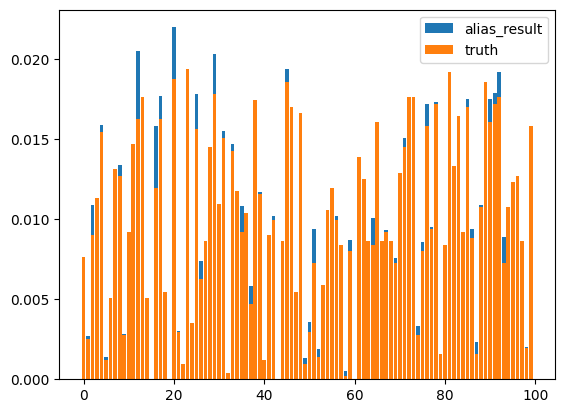

In [9]:
def gen_prob_dist(N):
    p = np.random.randint(0, 100, N)
    return p/np.sum(p)


def simulate(N=100, k=10000,):

    truth = gen_prob_dist(N)

    area_ratio = truth
    accept, alias = create_alias_table(area_ratio)

    ans = np.zeros(N)
    for _ in range(k):
        i = alias_sample(accept, alias)
        ans[i] += 1
    return ans/np.sum(ans), truth



alias_result, truth = simulate()
plt.bar(list(range(len(alias_result))), alias_result, label='alias_result')
plt.bar(list(range(len(truth))), truth, label='truth')
plt.legend()

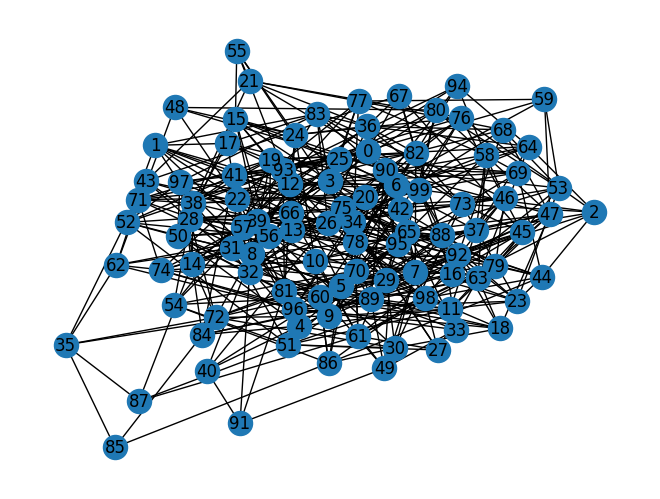

In [10]:
# Create an Erdős-Rényi graph with 100 nodes and probability 0.1
G_erdos = nx.erdos_renyi_graph(100, 0.1)

# Plot the graph with labels
nx.draw(G_erdos, with_labels=True)
plt.show()

In [11]:
# Create an Erdős-Rényi graph with 100 nodes and probability 0.1
G_erdos = nx.erdos_renyi_graph(100, 0.1)

# Get the edge list of the graph
edge_list = G_erdos.edges

# Create a dictionary to store the edge list with weights and total weightsum
edgedistdict = collections.defaultdict(int)
weightsum = 0

# For each edge in the edge list, assign a random weight between 1 and 100.
for edge in edge_list:
    weight = np.random.uniform(1, 100)
    edgedistdict[(edge[0], edge[1])] = weight
    weightsum += weight

for edge, weight in edgedistdict.items():
    edgedistdict[edge] = weight / weightsum

# Print the normalized edge list with weights
print(edgedistdict)


defaultdict(<class 'int'>, {(0, 16): 0.004039745604824959, (0, 23): 0.0011476709381806195, (0, 26): 0.0037963378104404603, (0, 30): 0.0011215310368708439, (0, 31): 0.000647699669481012, (0, 39): 0.0023017106184354, (0, 41): 0.003292581970204477, (0, 43): 0.0006213123736552083, (0, 46): 0.00040804198713189374, (0, 54): 0.0022510596234896693, (0, 62): 0.0004994929830097013, (0, 72): 0.002260251881180708, (0, 76): 0.0007874842172269806, (0, 84): 0.0022210364771773636, (1, 42): 0.0025271926770997683, (1, 51): 0.0010203580307790816, (1, 57): 0.0038848030178861904, (1, 58): 0.0004401622355003306, (1, 64): 0.0027246532189687724, (1, 66): 0.002673095351579783, (1, 87): 0.002237953640558546, (1, 94): 0.00017520985608171022, (2, 3): 0.003588970501707902, (2, 12): 0.0030003243578198835, (2, 26): 0.0019044396276838144, (2, 34): 0.0024716936573061393, (2, 38): 0.0004144008690369022, (2, 48): 0.0024978897317310318, (2, 71): 0.002066017456521018, (2, 73): 0.0022749488097566673, (2, 97): 0.00328693016

In [12]:
# Edge sampling using alias table
edgesaliassampler = VoseAlias(edgedistdict)
batchrange = int(len(edgedistdict) / 5)

for b in trange(batchrange):
  print(edgesaliassampler.sample_n(size=5))

100%|██████████| 97/97 [00:00<00:00, 100530.64it/s]

[(49, 66), (64, 68), (11, 83), (7, 88), (7, 88)]
[(9, 79), (59, 67), (54, 84), (60, 85), (19, 32)]
[(58, 89), (1, 51), (45, 67), (1, 57), (15, 44)]
[(43, 63), (4, 64), (83, 99), (57, 82), (30, 44)]
[(0, 26), (43, 63), (7, 36), (36, 95), (22, 62)]
[(4, 26), (7, 79), (42, 74), (37, 81), (30, 88)]
[(55, 64), (8, 77), (41, 49), (53, 78), (1, 57)]
[(3, 25), (5, 48), (9, 18), (30, 88), (35, 39)]
[(12, 39), (6, 27), (78, 84), (32, 80), (17, 52)]
[(22, 45), (69, 80), (55, 63), (21, 41), (37, 76)]
[(17, 99), (4, 29), (13, 97), (17, 54), (0, 39)]
[(56, 97), (68, 90), (17, 54), (19, 97), (39, 74)]
[(2, 97), (31, 90), (60, 85), (81, 95), (4, 29)]
[(30, 80), (12, 39), (20, 32), (35, 39), (64, 93)]
[(1, 42), (35, 96), (74, 94), (11, 95), (4, 84)]
[(58, 69), (55, 64), (54, 84), (78, 90), (35, 91)]
[(20, 71), (7, 88), (22, 44), (56, 57), (42, 74)]
[(55, 74), (42, 52), (6, 27), (6, 72), (6, 9)]
[(43, 82), (1, 87), (16, 61), (10, 25), (0, 16)]
[(56, 97), (27, 76), (27, 95), (2, 12), (56, 61)]
[(22, 56),

# 2. Singular Value Decomposition in Matrix Adjacency

In [13]:
import networkx as nx
import numpy as np
from scipy.sparse.linalg import svds
from scipy.sparse import csr_matrix

# Load the karate club network
G = nx.karate_club_graph()

# Define the Katz index similarity
def katz_index(G, alpha=0.5, max_iter=100, tol=1e-3):
    n = len(G.nodes())
    A = nx.adjacency_matrix(G).todense()
    I = np.eye(n)
    X = I
    converged = False
    for i in range(max_iter):
        X_prev = X
        X = alpha * A.dot(X) + (1 - alpha) * I
        if np.linalg.norm(X - X_prev) < tol:
            converged = True
            break
    return X

# Compute the Katz index similarity matrix
X = katz_index(G)

# Perform singular value decomposition on the adjacency matrix
U, s, Vh = svds(X, k=2)

# Print the singular values
print(s)

# Print the left singular vectors
print(U)

# Print the right singular vectors
print(Vh)


[7.38938304e+092 3.46416835e+103]
[[ 0.33091324 -0.31235123]
 [ 0.33411764 -0.30175117]
 [ 0.27459467 -0.36058862]
 [ 0.24818117 -0.19856719]
 [ 0.08309549 -0.05567475]
 [ 0.1082723  -0.06742808]
 [ 0.10598532 -0.06644822]
 [ 0.22454967 -0.17843234]
 [-0.03320008 -0.24695058]
 [-0.02345499 -0.05020307]
 [ 0.07224994 -0.04583322]
 [ 0.05803341 -0.04320695]
 [ 0.06286906 -0.04186974]
 [ 0.18811315 -0.24048654]
 [-0.0978488  -0.07953765]
 [-0.13735629 -0.1131142 ]
 [ 0.03757522 -0.01851886]
 [ 0.05822085 -0.04271819]
 [-0.05895456 -0.04889692]
 [ 0.05799868 -0.07342003]
 [-0.07809493 -0.06274937]
 [ 0.07775272 -0.05663175]
 [-0.09815524 -0.08100556]
 [-0.28970308 -0.21804371]
 [-0.06604046 -0.05104891]
 [-0.17460709 -0.12258229]
 [-0.08337372 -0.05862926]
 [-0.12623474 -0.14768307]
 [-0.03089115 -0.08614539]
 [-0.18759821 -0.13583302]
 [-0.08436102 -0.15831325]
 [-0.20089695 -0.20945644]
 [-0.33266879 -0.33226141]
 [-0.33791522 -0.36409688]]
[[ 0.3942736  -0.06223468  0.38728464  0.026684